# Project Information

### Objective :

- To build, train, and deploy an Artificial Intelligence (AI) model to predict sentiment from thousands of tweets. Sentiment Prediction involves understanding of people feelings about a product or service.

### Tools :

- Python, Scikit-Learn, Matplotlib, Seaborn

### Practical Real-World Application :

- AI/ML sentiment analysis tools empower companies to automatically predict whether their customers are happy or not. The process could be done automatically without having humans manually review thousands of tweets/reviews.

### Data :

- **Input:** Twitter tweets (Text data)
- **Output:** Sentiment (0 or 1)

### Sentiment Analysis (NLP Model) :

- Natural Language Processors (NLP) work by converting words (text) into numbers.
- These numbers are then used to train an AI/ML model to make predictions.
- Predictions could be sentiment inferred from social media posts and product reviews.
- AI/ML-based sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not.
- The process could be done automatically without having humans manually review thousands of tweets and customer reviews.
- In this case study, we will analyze thousands of Twitter tweets to predict people's sentiment.

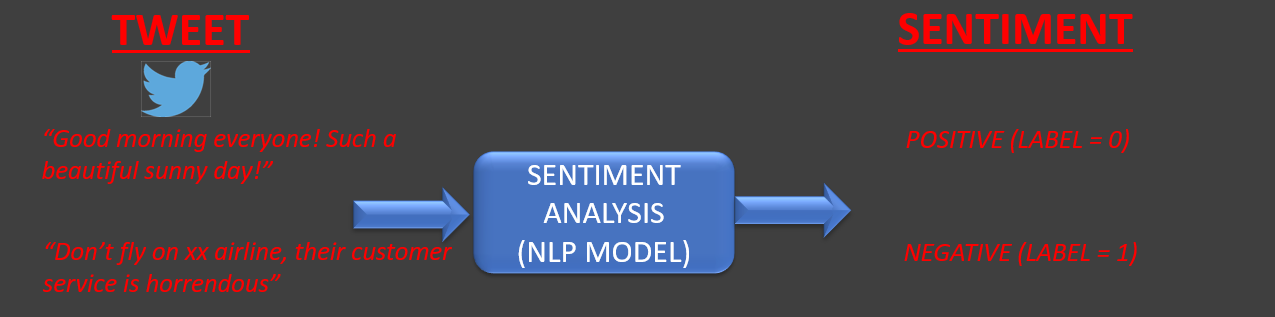

### Key Learning Outcomes :

- Apply python libraries such as Pandas, Matplotlib and Seaborn to analyze and visualize text dataset.
- Perform Exploratory Data Analysis and plot Word Cloud.
- Perform text data cleaning such as removing Punctuation and Stopwords
- Understand the concept of Count Vectorization and perform Tokenization to tweet text data using Scikit-learn library.
- Understand the theory and intuition behind Naive Bayes classifiers and learn the difference between Prior Probability, Posterior Probability, and Likelihood.
- Train Naive Bayes classifier models using Scikit-learn to perform classification and evaluatet its performance using various KPIs.

---

# Task 1: Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
tweets_df = pd.read_csv('twitter.csv')

In [3]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [7]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

In [8]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# Task 2: Perform Data Exploration

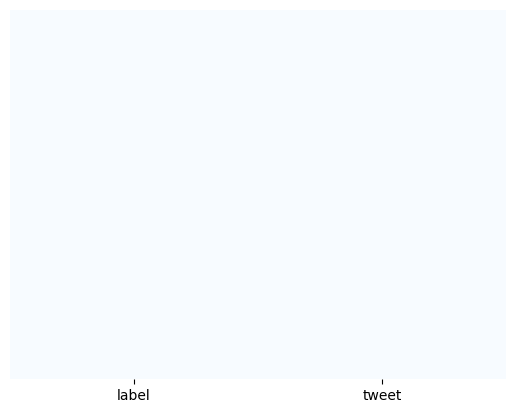

In [9]:
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

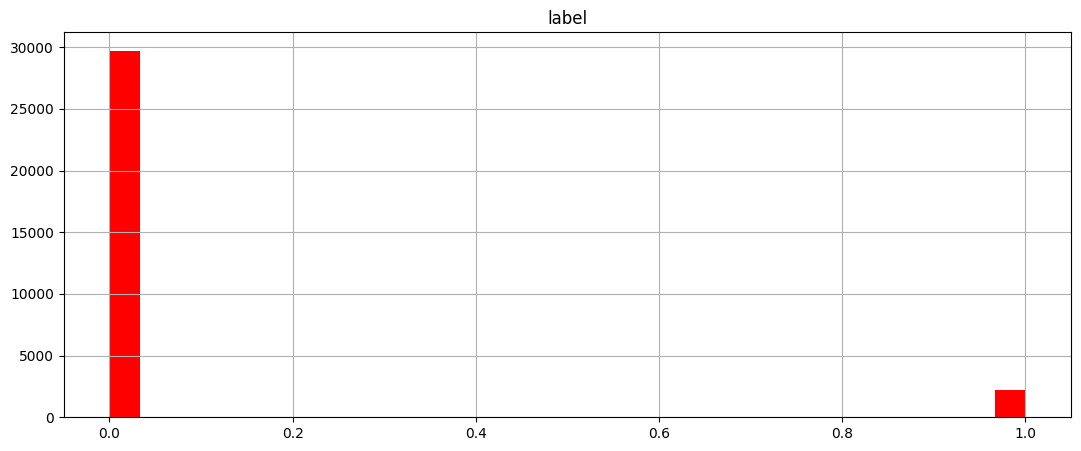

In [10]:
# Plot the histogram
tweets_df.hist(bins = 30, figsize = (13, 5), color = 'r')
plt.show()

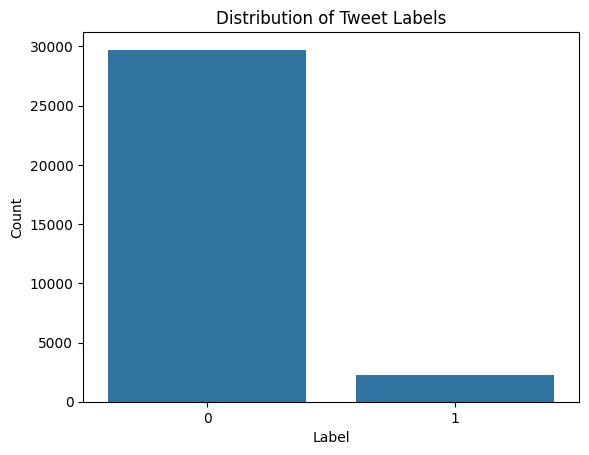

In [11]:
# Plot countplot
sns.countplot(x='label', data=tweets_df)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Tweet Labels")
plt.show()

In [12]:
# Let's get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [13]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [14]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [15]:
# Let's view the shortest message 
tweets_df[tweets_df['length'] == 11]['tweet']

25195    i love you 
Name: tweet, dtype: object

# Practice Opportunity #1

- Using `tweets_df` DataFrame, view the tweet that has average number of characters.

- Plot the histogram of the "length" column.

In [16]:
# Let's view the message with mean length 
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

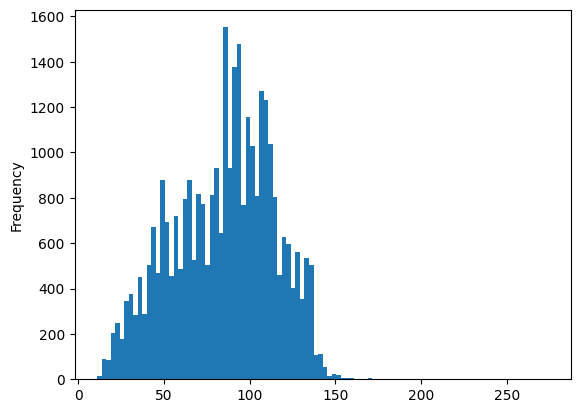

In [17]:
# Plot the histogram of the length column
tweets_df['length'].plot(bins = 100, kind = 'hist')
plt.show()

# Task 3: Plot the wordcloud

In [18]:
positive = tweets_df[tweets_df['label'] == 0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [19]:
negative = tweets_df[tweets_df['label'] == 1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [20]:
sentences = tweets_df['tweet'].tolist()
len(sentences)

31962

In [21]:
sentences_as_one_string =" ".join(sentences)

In [22]:
# Viewing the first 200 characters of the string
sentences_as_one_string[:200]

" @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.   "

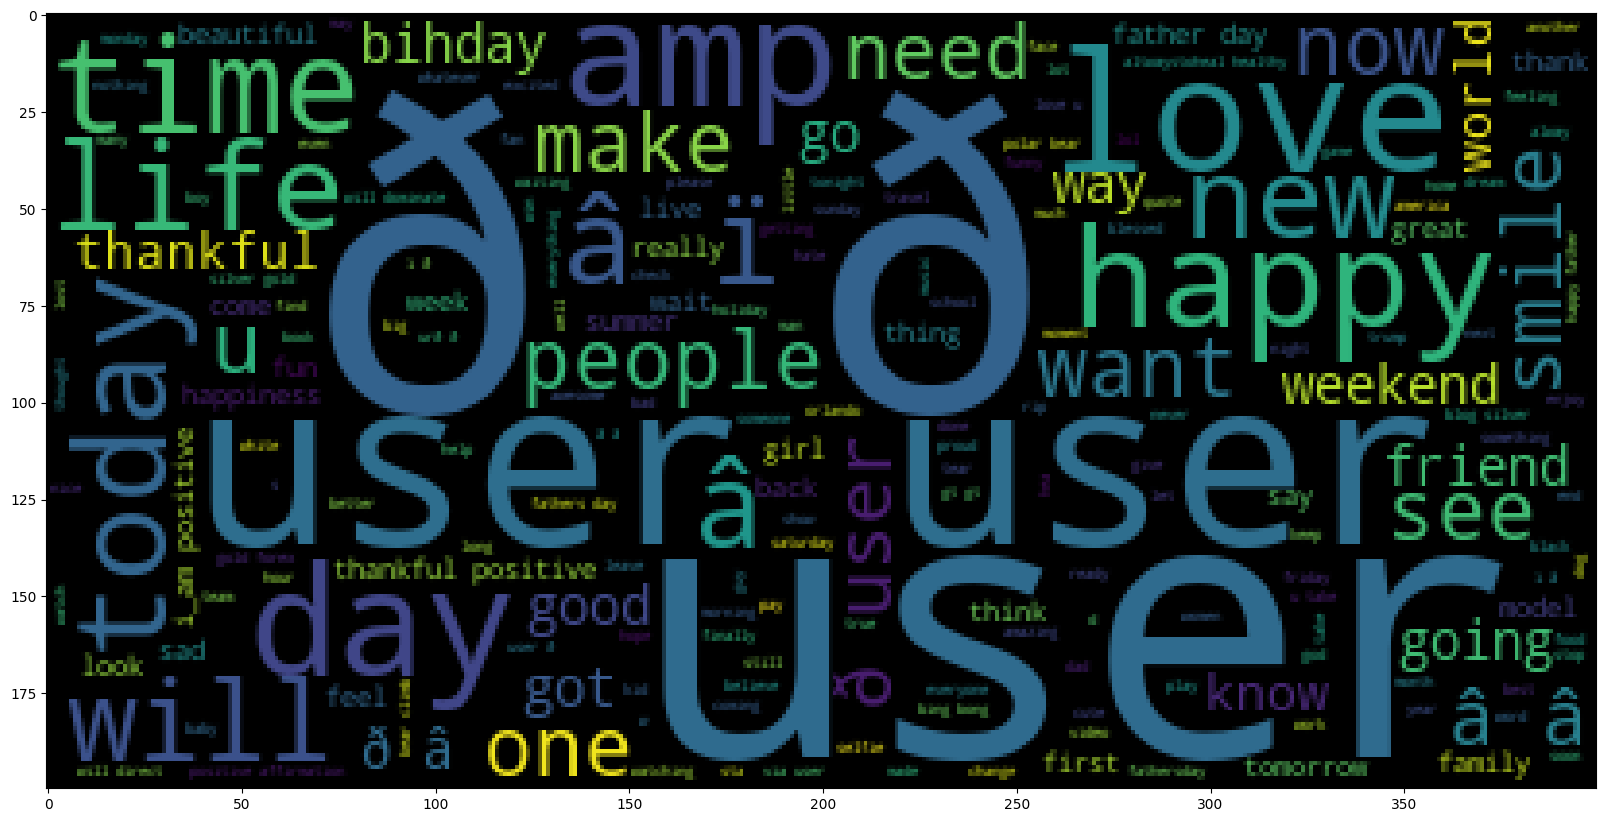

In [23]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))
plt.show()

# Practice Opportunity #2

Using the `tweets_df` DataFrame, plot the wordcloud of the **Negative** DataFrame.

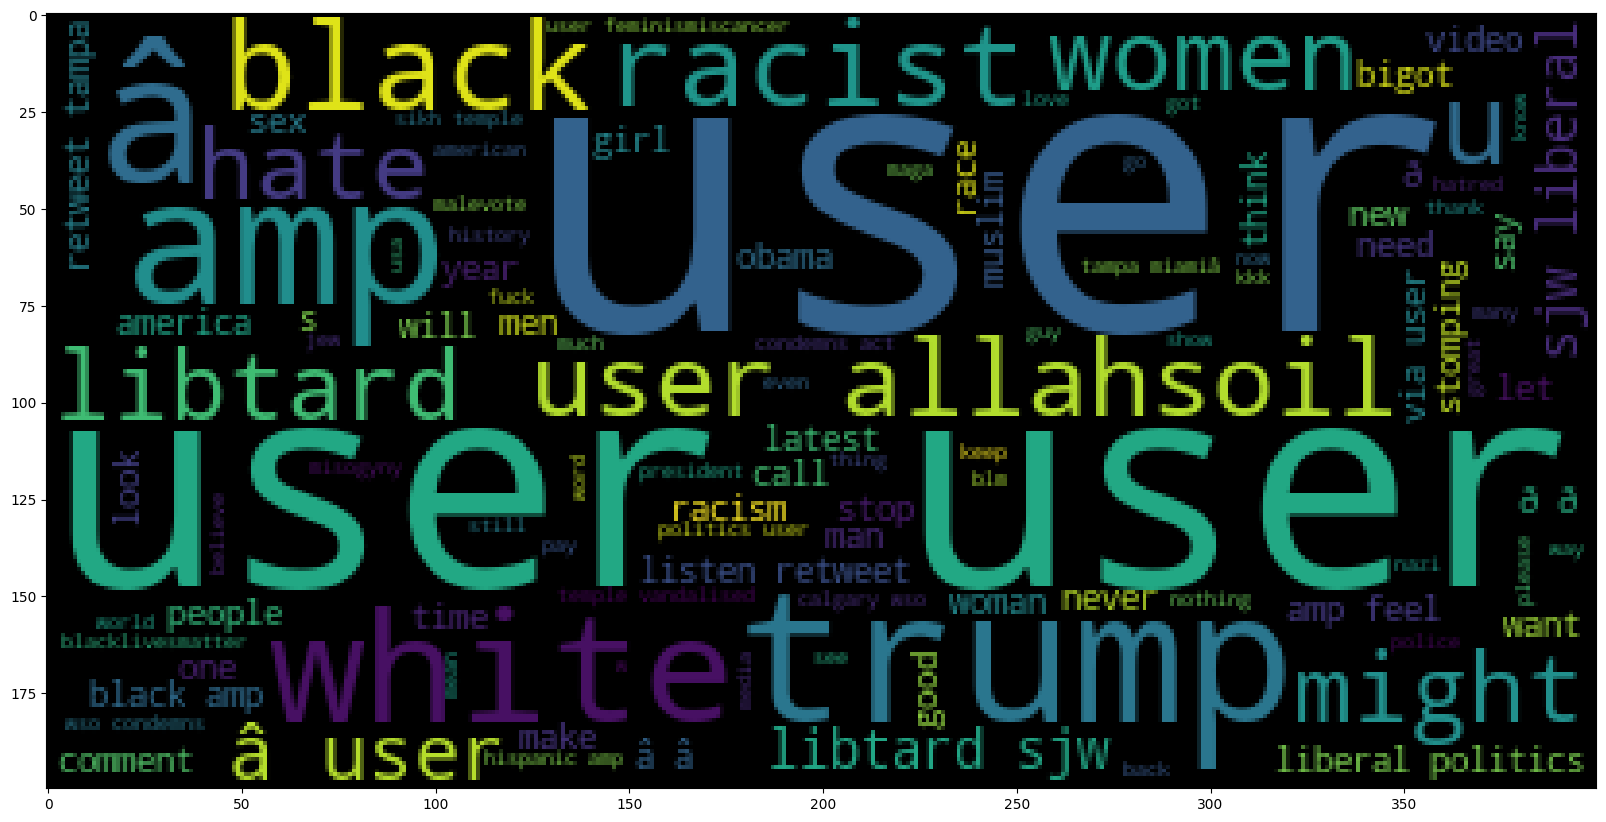

In [24]:
negative_list = negative['tweet'].tolist()
negative_sentences_as_one_string = " ".join(negative_list)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))
plt.show()

# Task 4: Perform Data Cleaning - Remove Punctuation from Text

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
Test = '$I love AI & Machine learning!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love AI  Machine learning'

In [27]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [28]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
print(Test_punc_removed)

['G', 'o', 'o', 'd', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 'b', 'e', 'a', 'u', 't', 'i', 'f', 'u', 'l', ' ', 'p', 'e', 'o', 'p', 'l', 'e', ' ', ' ', 'I', ' ', 'a', 'm', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'f', 'u', 'n', ' ', 'l', 'e', 'a', 'r', 'n', 'i', 'n', 'g', ' ', 'M', 'a', 'c', 'h', 'i', 'n', 'e', ' ', 'l', 'e', 'a', 'r', 'n', 'i', 'n', 'g', ' ', 'a', 'n', 'd', ' ', 'A', 'I']


In [29]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

# Task 5: Perform Data Cleaning - Remove Stopwords

In [30]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avikd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
Test_punc_removed_join = 'I enjoy coding, programming and Artificial intelligence'
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [32]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['enjoy', 'coding,', 'programming', 'Artificial', 'intelligence']

In [33]:
Test_punc_removed_join

'I enjoy coding, programming and Artificial intelligence'

# Practice Opportunity #3

For the following text, create a pipeline to remove punctuations followed by removing stopwords.

- mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [34]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [35]:
challenge = [char for char in mini_challenge if char not in string.punctuation]
challenge = ''.join(challenge)
challenge

'Here is a mini challenge that will teach you how to remove stopwords and punctuations'

In [36]:
challenge = [word for word in challenge.split() if word.lower() not in stopwords.words('english')]
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

# Task 6: Perform Count Vectorization (Tokenization)

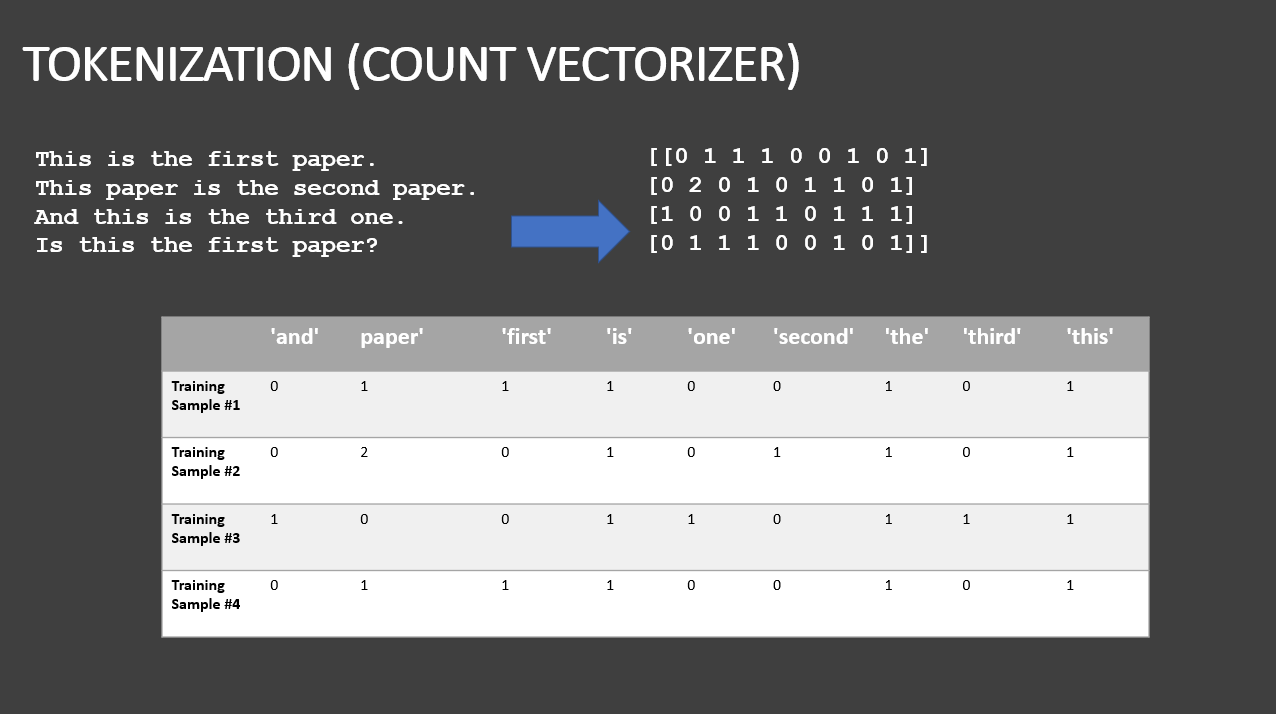

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This paper is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [38]:
print(vectorizer.get_feature_names_out())

['and' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [39]:
print(X.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]]


# Practice Opportunity #4

Perform **Count Vectorization** for the following list.

- mini_challenge = ['Hello World', 'Hello Hello World', 'Hello World world world']

In [40]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()  # Instantiate an object out of my class
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)

print(vectorizer_challenge.get_feature_names_out())
print(X_challenge.toarray())

['hello' 'world']
[[1 1]
 [2 1]
 [1 3]]


# Task 7: Create a pipeline to remove Punctuations, Stopwords, and perform Count Vectorization

In [41]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [42]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [43]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [44]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [46]:
print(vectorizer.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [47]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
tweets_countvectorizer.shape

(31962, 47386)

In [49]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [50]:
X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y = tweets_df['label']

In [52]:
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

# Task 8: Understand the theory and intuition behind Naive Bayes

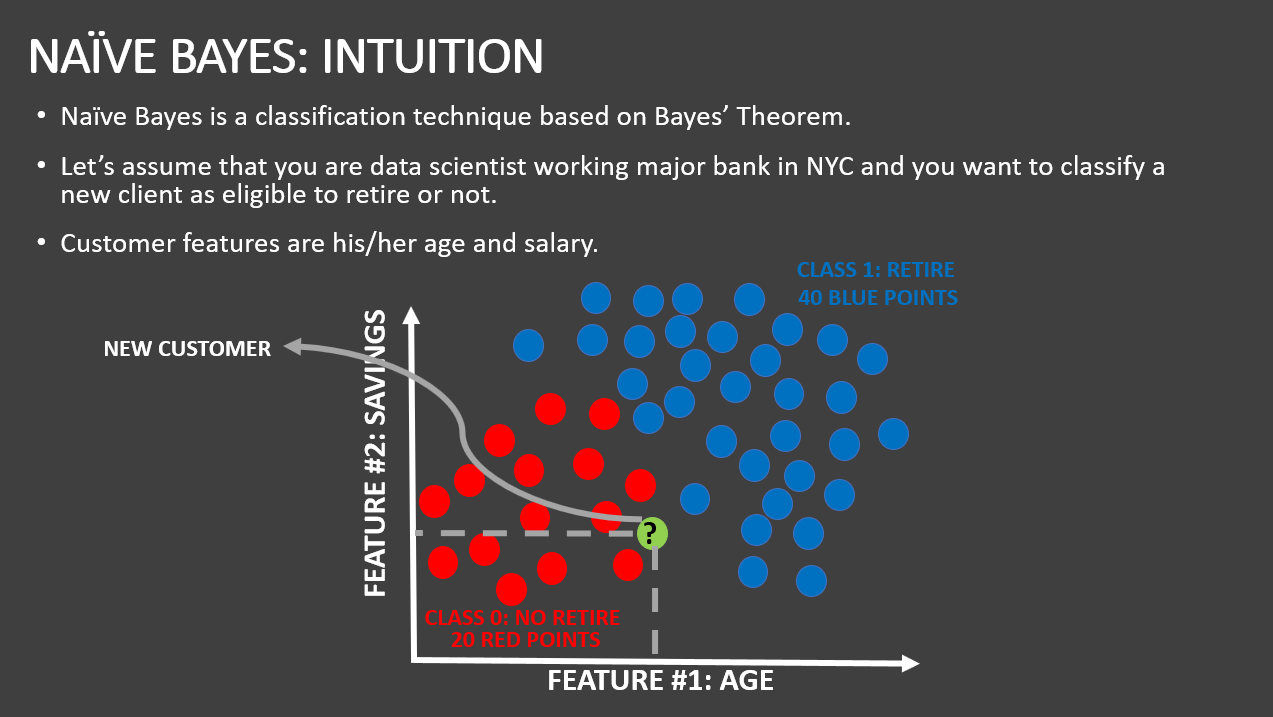

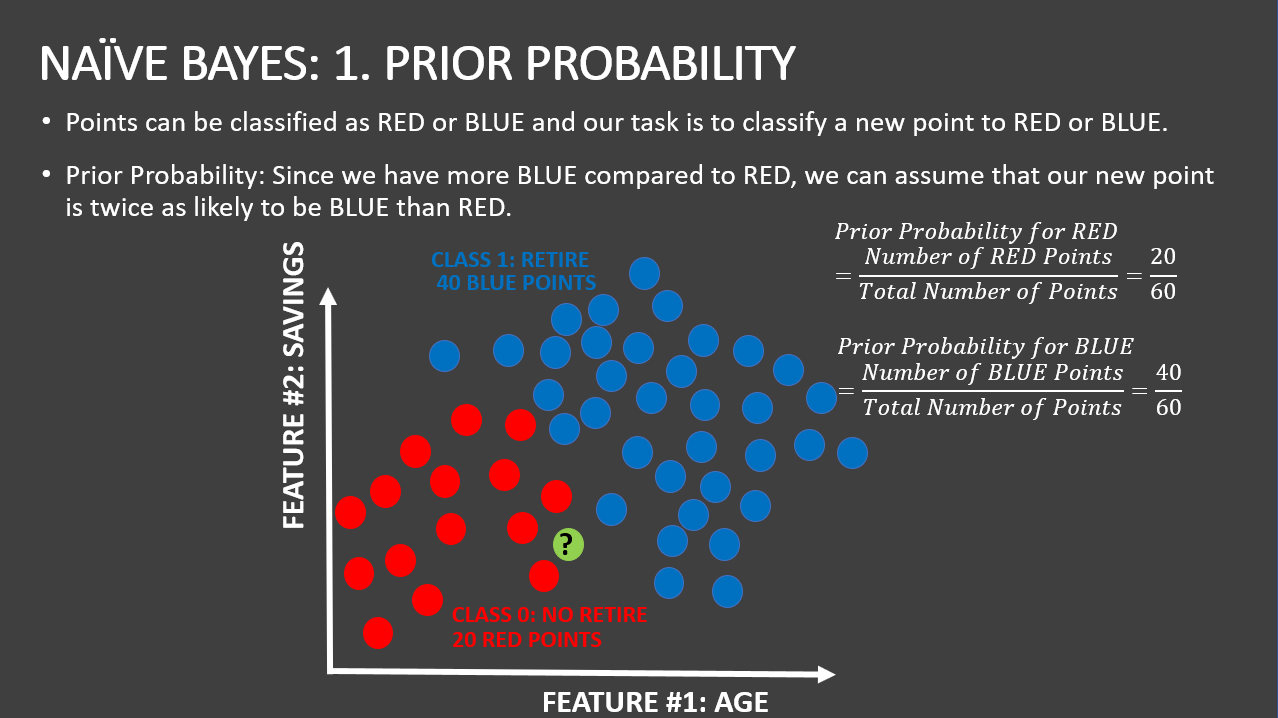

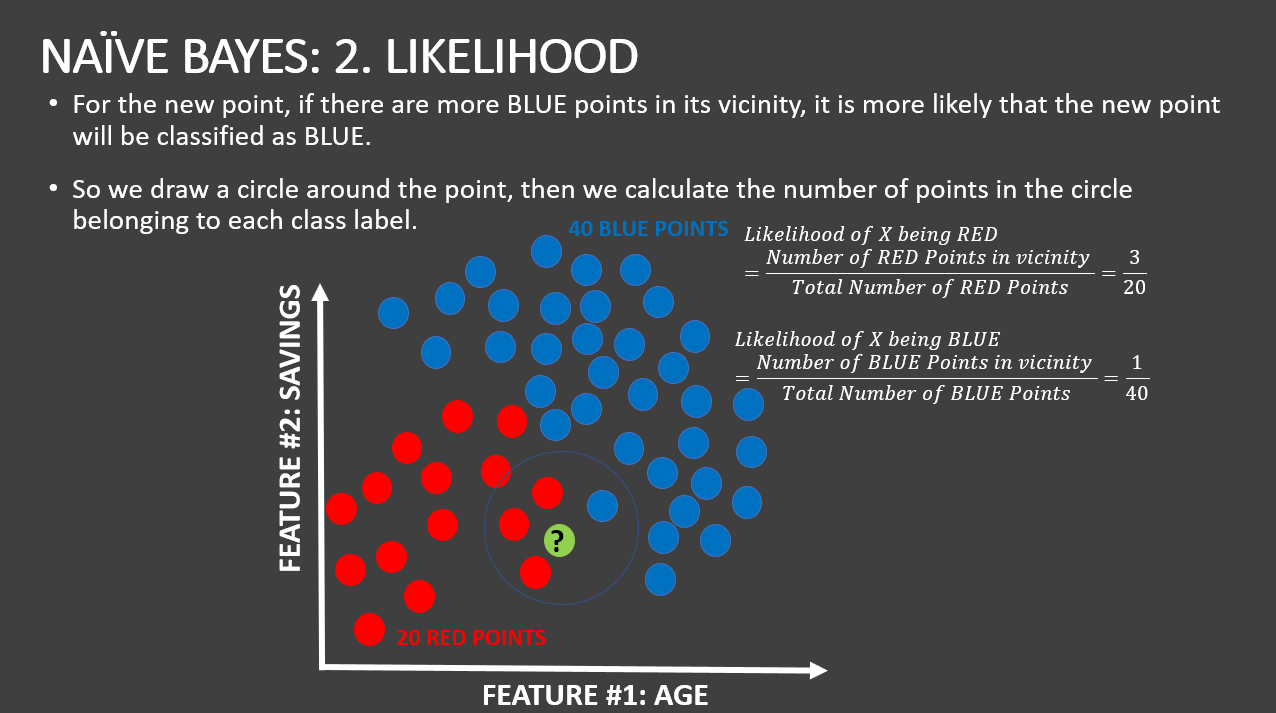

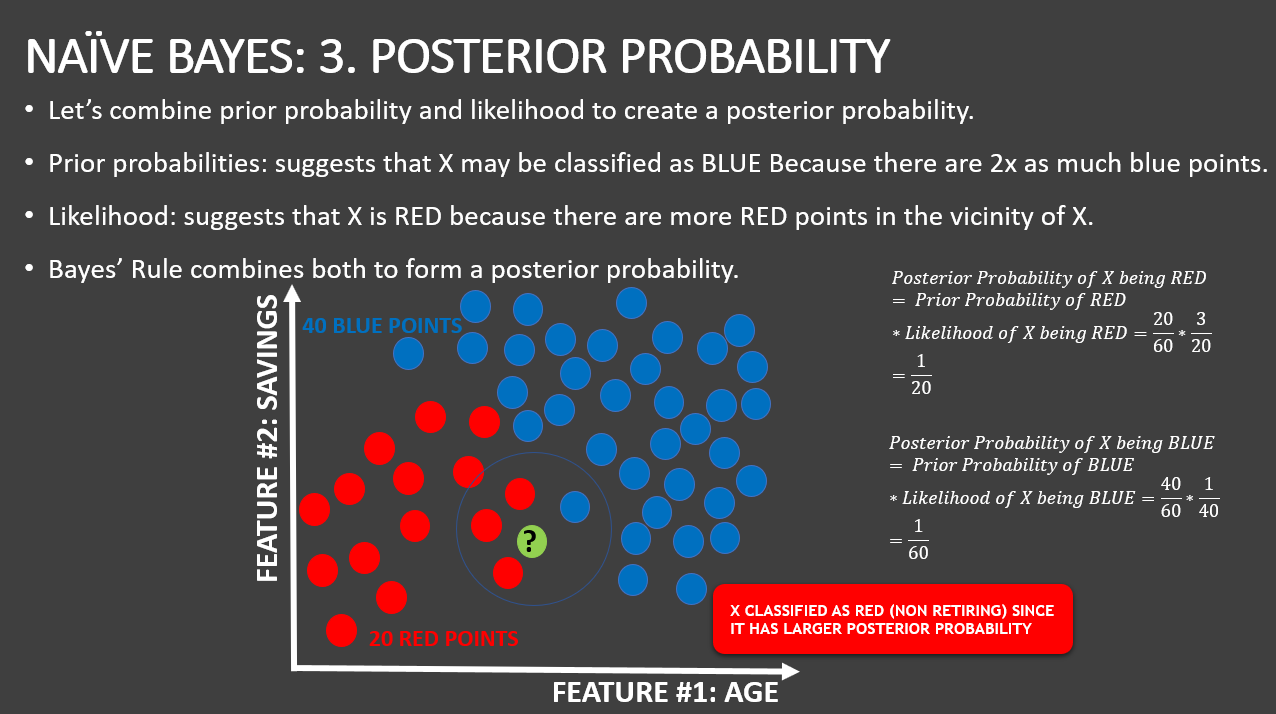

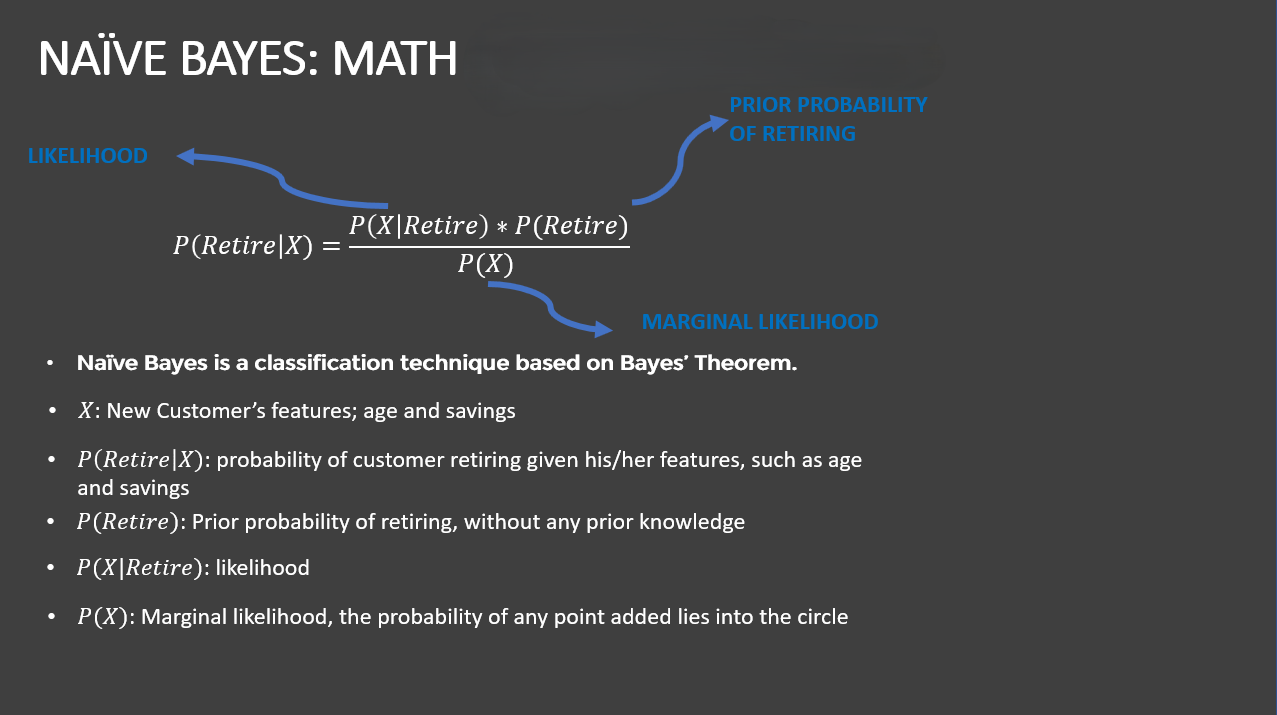

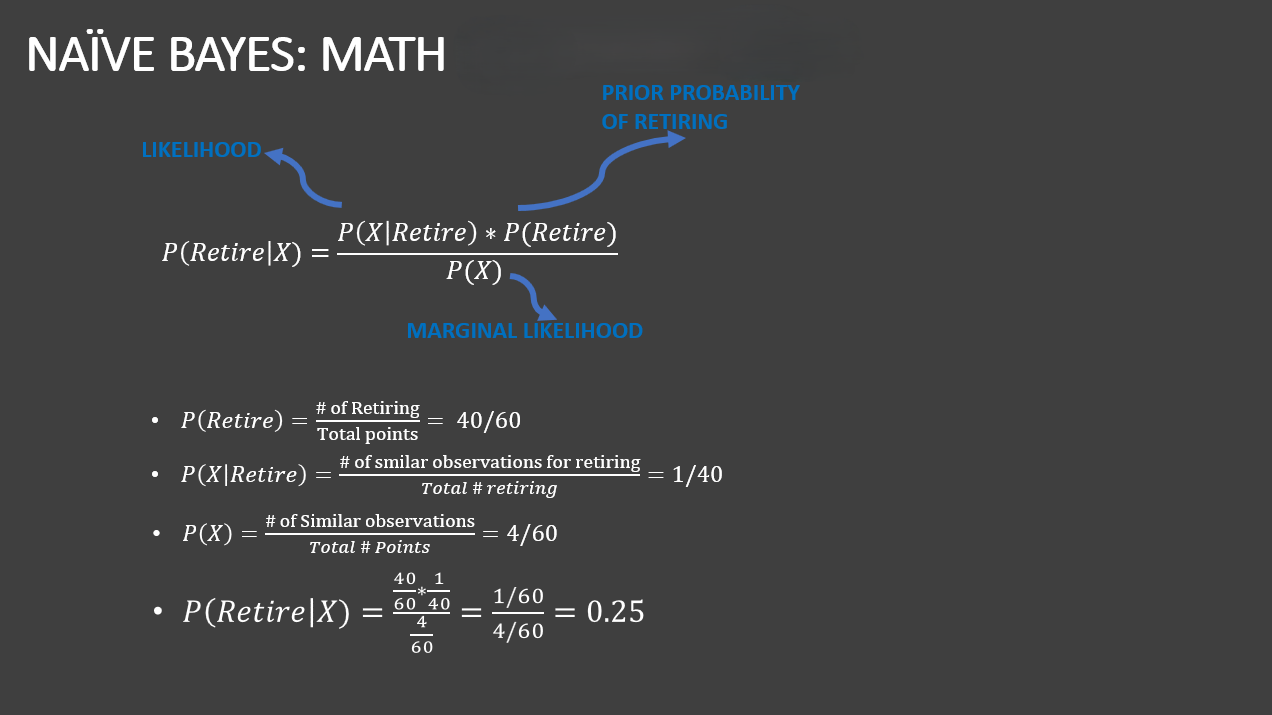

# Practice Opportunity #5

Calculate the probability of non-retiring (Red Class)

- **P (No Retire | X) = ?**

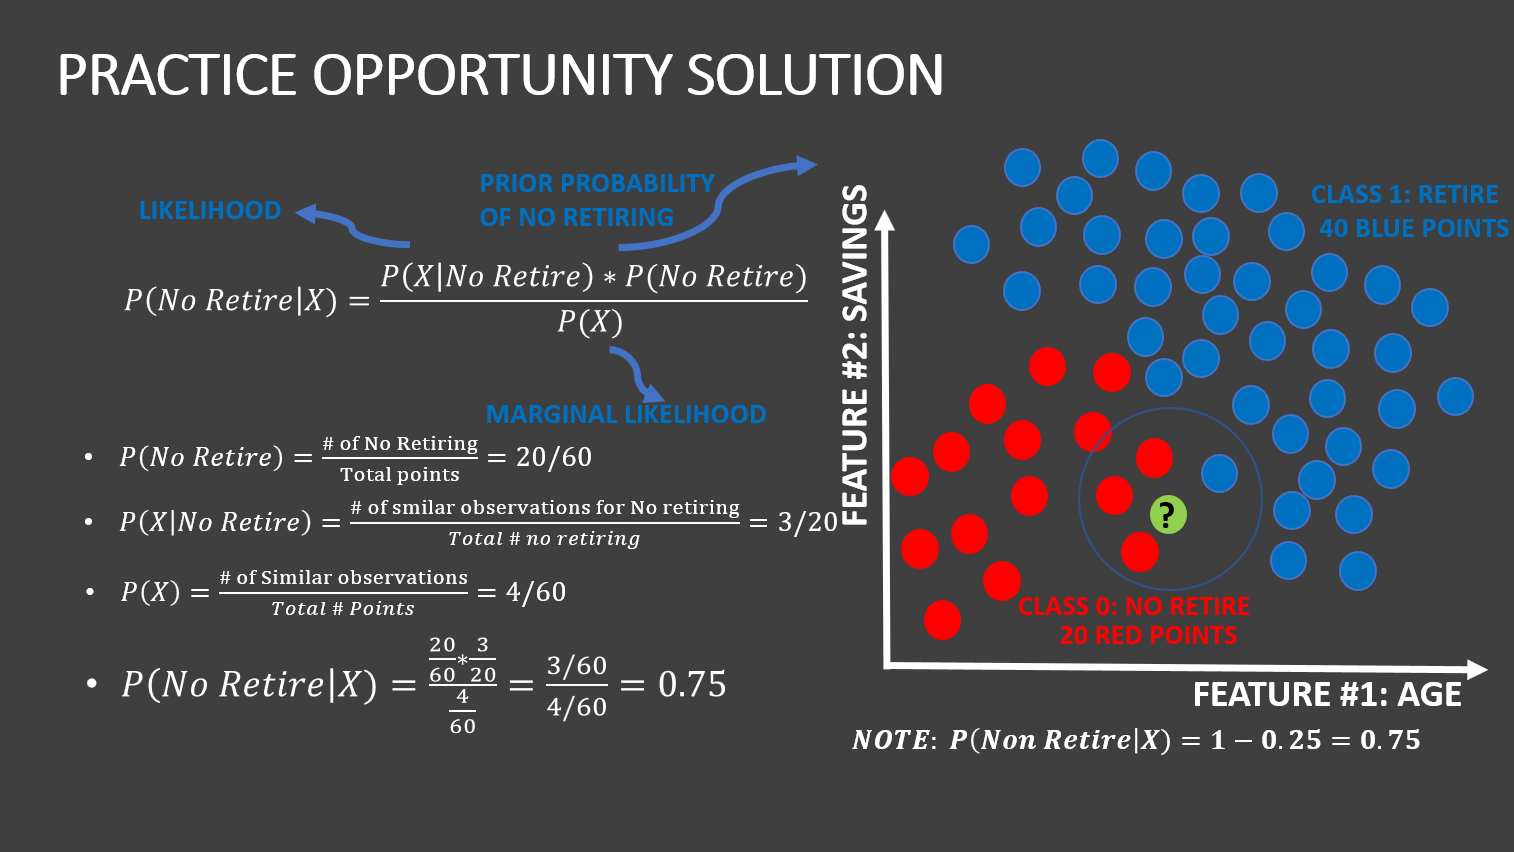

# Task 9: Train and evaluate a Naive Bayes Classifier Model

In [53]:
X.shape

(31962, 47386)

In [54]:
y.shape

(31962,)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [56]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


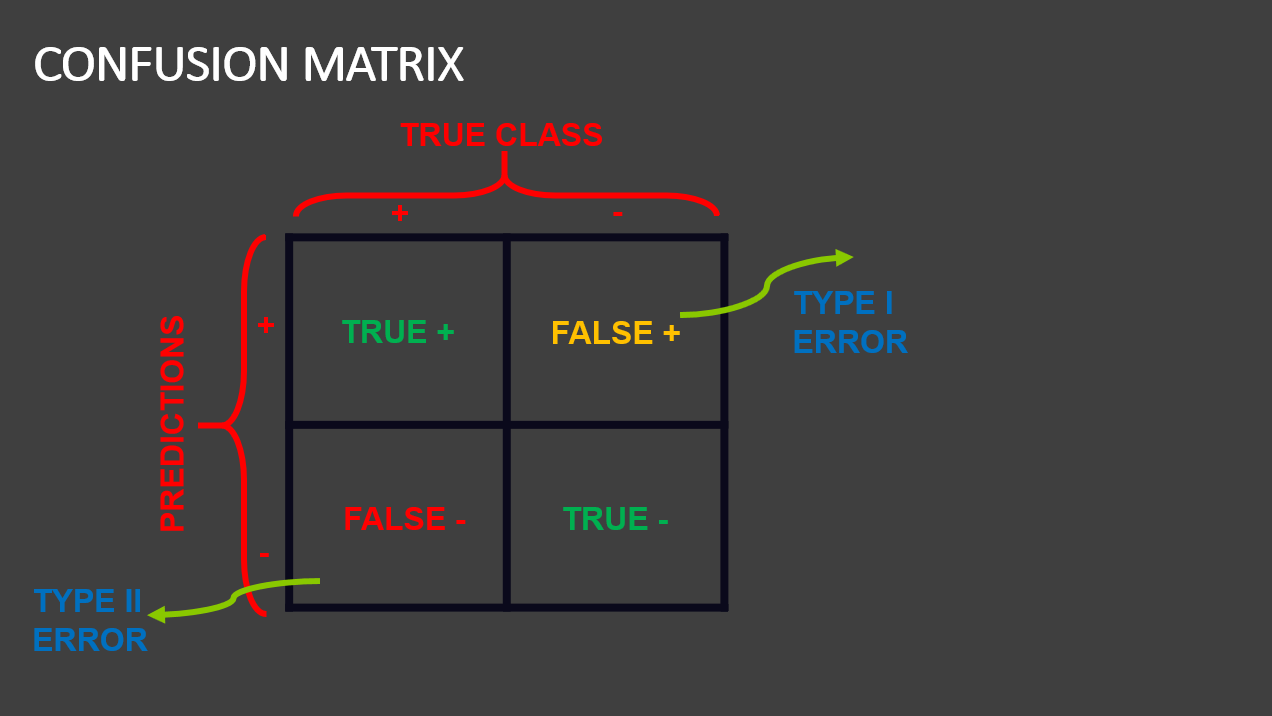

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

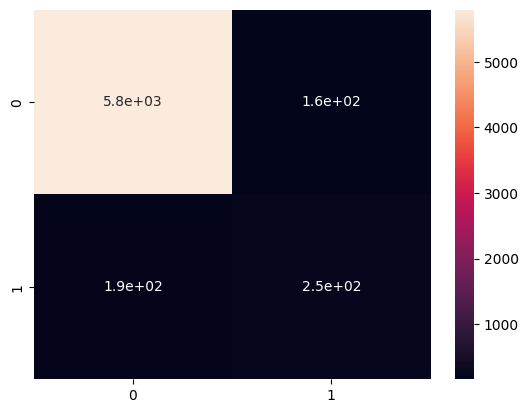

In [58]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
plt.show()

In [59]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5954
           1       0.61      0.56      0.59       439

    accuracy                           0.95      6393
   macro avg       0.79      0.77      0.78      6393
weighted avg       0.94      0.95      0.94      6393

